In [9]:
import pandas as pd
import numpy as np

# Scikit-Learn
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn import tree

# Tensorflow
import tensorflow as tf

# TSNE Visualization
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Reshape to a 2D array
num_samples, width, height = X_train.shape
X_train = X_train.reshape((num_samples, width * height))

num_samples, width, height = X_test.shape
X_test = X_test.reshape((num_samples, width * height))

Loop through multiple values for max_depth ...
max_depth = 5, accuracy = 69.95%
max_depth = 6, accuracy = 75.68%
max_depth = 7, accuracy = 79.85%
max_depth = 8, accuracy = 83.58%
max_depth = 9, accuracy = 86.02%
max_depth = 10, accuracy = 87.24%
max_depth = 11, accuracy = 88.06%
max_depth = 12, accuracy = 88.28%
max_depth = 13, accuracy = 89.08%
max_depth = 14, accuracy = 88.72%
max_depth = 15, accuracy = 88.73%
Highest accuracy: 89.08 % for max_depth = 13.



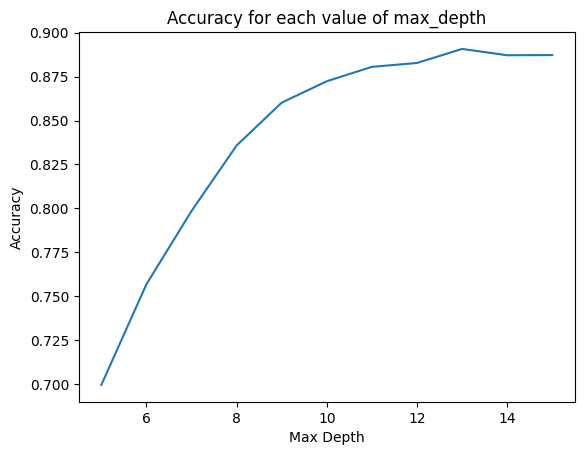

In [11]:
#Loop for max_depth value
print("Loop through multiple values for max_depth ...")
md_values = range(5, 16)
md_accuracies = []

values = np.arange(5, 16)
for md in values:
    # Train the classifier with the current value of 'max_depth'
    model = DecisionTreeClassifier(criterion = 'entropy', max_depth = md, random_state = 0)
    model.fit(X_train, y_train)

    # Evaluate the model
    eval_score = model.score(X_test, y_test)
    print("max_depth = {}, accuracy = {}%".format(md, eval_score * 100))
    # Update the accuracies list
    md_accuracies.append(eval_score)

# Find the value of max_depth with the largest accuracy
max_accuracy = int(np.argmax(md_accuracies))
print("Highest accuracy: {} % for max_depth = {}.\n".format(md_accuracies[max_accuracy] * 100, md_values[max_accuracy]))

# Line plot for the accuracies based on the value of 'max_depth'
plt.plot(values, md_accuracies)
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.title("Accuracy for each value of max_depth")
plt.show()

In [12]:
# GridSearchCV for min_samples_split and max_features
print("Use GridSearchCV for finding the best values for\
min_samples_split, max_features & min_samples_leaf...")

param = {'min_samples_split': [2, 4, 6],
        'max_features': ['sqrt', 'log2'],
        'min_samples_leaf': [5,6,7,8,9]}

grid = GridSearchCV(DecisionTreeClassifier(criterion = 'entropy', max_depth = md_values[max_accuracy], random_state = 0),
                    param, cv=5, refit=True, verbose=True)
grid.fit(X_train, y_train)

# GridSearch results
best_params = grid.best_params_
print("Best Parameters:", best_params)
print("Score:", grid.best_score_)

useful_params = False
# Check for accuracy improvement
if grid.best_score_ > md_accuracies[max_accuracy]:
  useful_params = True
  print("The above parameters improve the accuracy of the model.\
  Thus, they will be used in the final model.")

else:
  print("The above parameters didn't improve the accuracy of the model.\
  Thus, they will not be used in the final model.")

Use GridSearchCV for finding the best values formin_samples_split, max_features & min_samples_leaf...
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters: {'max_features': 'sqrt', 'min_samples_leaf': 6, 'min_samples_split': 2}
Score: 0.8267999999999999
The above parameters didn't improve the accuracy of the model.  Thus, they will not be used in the final model.


In [13]:
# Create Decision Trees Classifier
# Use the value of max_depth which achieved the highest accuracy
if useful_params:
  model = DecisionTreeClassifier(criterion = 'entropy', max_depth = md_values[max_accuracy], \
                                 max_features = best_params['max_features'], \
                                 min_samples_split = best_params['min_samples_split'], \
                                 min_samples_leaf = best_params['min_samples_leaf'],
                                 random_state = 0)
else:
  model = DecisionTreeClassifier(criterion = 'entropy', max_depth = md_values[max_accuracy], random_state = 0)

# Train the model using the training data
model.fit(X_train, y_train)

# Predict the label for test data
preds = model.predict(X_test)

# Model evaluation with classification report
print("\n Classification Report for the final model")
print(classification_report(y_test, preds))


 Classification Report for the final model
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       980
           1       0.96      0.97      0.97      1135
           2       0.87      0.88      0.88      1032
           3       0.86      0.86      0.86      1010
           4       0.88      0.87      0.87       982
           5       0.84      0.86      0.85       892
           6       0.92      0.90      0.91       958
           7       0.92      0.90      0.91      1028
           8       0.84      0.85      0.85       974
           9       0.86      0.87      0.86      1009

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



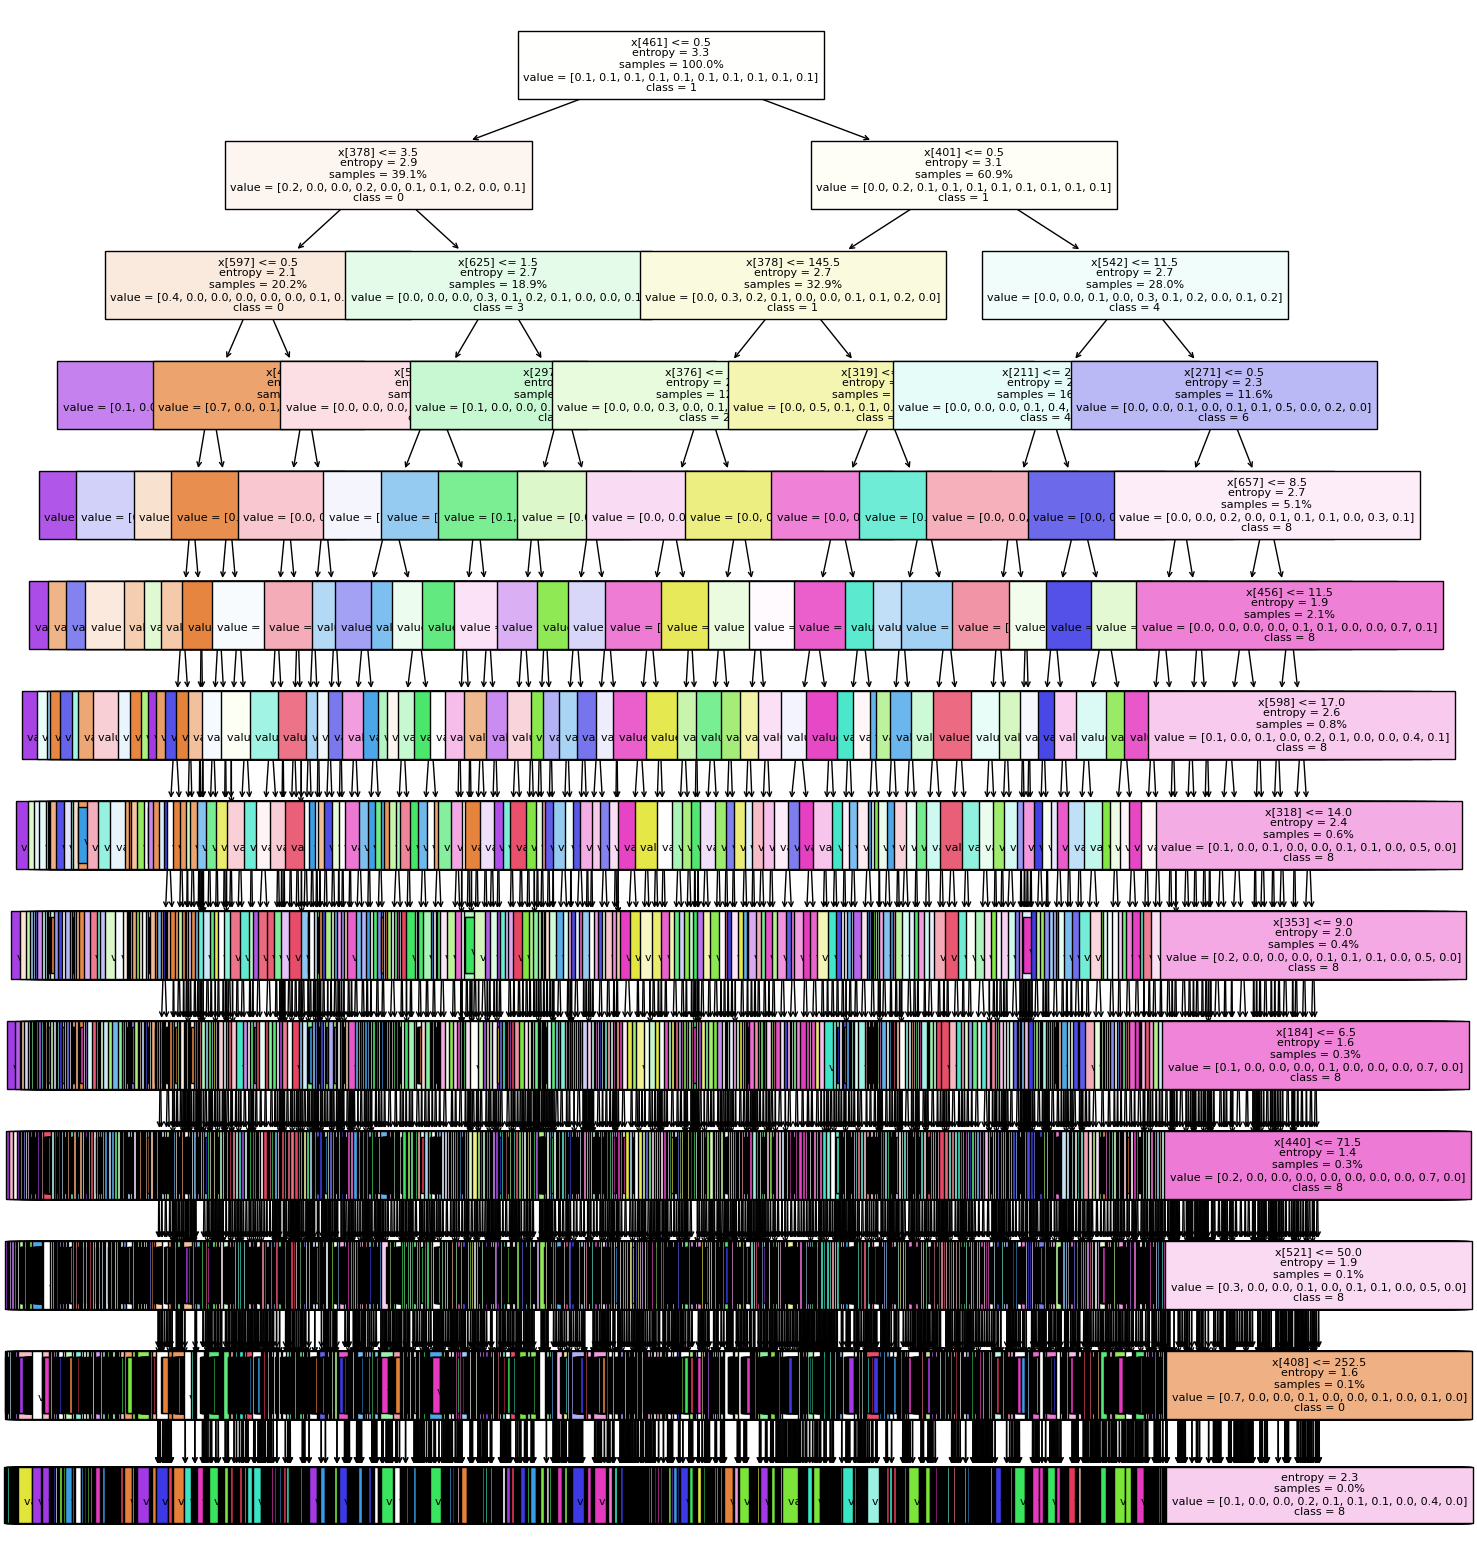

In [14]:
# Decision Tree Graph
plt.figure(figsize=(15,20))
_ = tree.plot_tree(model, filled=True, class_names=['0','1','2','3','4','5','6','7','8','9'],
                  proportion=True, precision=1, fontsize=8)
plt.show()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.006s...
[t-SNE] Computed neighbors for 10000 samples in 7.185s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 517.864415
[t-SNE] KL divergence after 250 iterations with early exaggeration: 86.609375
[t-SNE] KL divergence after 1000 iterations: 1.779227


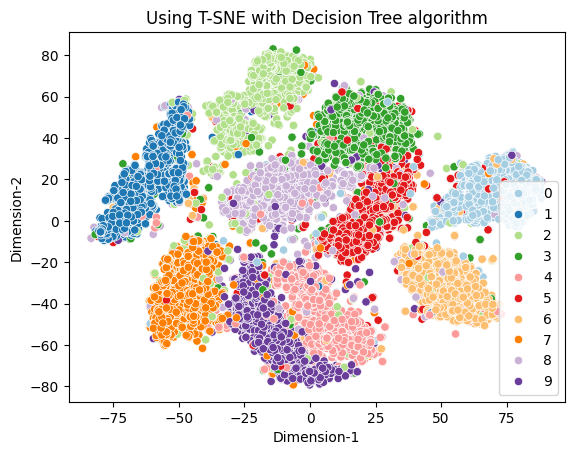

In [15]:
#TSNE Visualization after Decision Tree
tsne = TSNE(n_components = 2, verbose = 1, random_state = 0)
z = tsne.fit_transform(X_test)
df = pd.DataFrame()
df["y"] = preds
df["Dimension-1"] = z[:,0]
df["Dimension-2"] = z[:,1]

sns.scatterplot(x="Dimension-1", y="Dimension-2", hue=df.y.tolist(),
                palette=sns.color_palette("Paired", 10),
                data=df).set(title="Using T-SNE with Decision Tree algorithm")
plt.show()